In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
import plotly.subplots as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import log_loss,roc_auc_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Задание №1

Провести разведочный анализ, построить диаграммы распределений пасажиров по каждому из признаков. Построить графики совместного распределения для всех признаков.


In [2]:
df = pd.read_csv("train.csv")
print(f"Размерность данных: {df.shape}")
df.head()

Размерность данных: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Описание признаков:

*  PassengerId: идентификационный номер пассажира в таблице
*  Survived: выжил ли пассажир
*  Pclass: Класс билета, который также может служить индикатором социально-экономического статуса
*  Name: Имя пассажира
*  Sex: Пол пассажира
*  Age: Возраст пассажира
*  Sibsp: Количество братьев, сестер или супругов, находившихся на борту
*  Parch: Количество родителей или детей, находившихся на борту
*  Ticket: Номер билета
*  Fare: Стоимость билета пассажира
*  Cabin: Номер каюты пассажира
*  Embarked: Порт, в который пассажир сел на борт

## Число пропусков в данных:

In [3]:
nun_info = pd.DataFrame(df.isnull().sum(), columns=['cnt'])
nun_info['share'] = round((nun_info['cnt'] / len(df)) * 100,2).astype(str) + '%'
nun_info.sort_values(by=['cnt'], ascending=False)

,cnt,share
Cabin,687,77.1%
Age,177,19.87%
Embarked,2,0.22%
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
SibSp,0,0.0%
Parch,0,0.0%


* Больше всего пропусков у признака Cabin, как будто номер каюты пассажира не сильно важный признак, если мы не знаем как они располагались - поэтому уберем его из анализа
* Age содержит 19.87% пропусков, но это важный признак, поскольку выживаемость детей обычно в приоритете
* Порт неизвестен только в 2 случаях, поэтому можно удалить данных людей из выборки

## Число дублей в данных:

In [4]:
print(f"Количество дубликатов строк: {df.duplicated().sum()}")

Количество дубликатов строк: 0


## Число уникальных значений в столбцах:

In [5]:
pd.DataFrame(df.nunique(), columns=['cnt']).sort_values(by=['cnt'], ascending=False)

,cnt
PassengerId,891
Name,891
Ticket,681
Fare,248
Cabin,147
Age,88
SibSp,7
Parch,7
Pclass,3
Embarked,3


* PassengerId и Name - идентификационный номер пассажира в таблице и имя соответсвенно, отсюда каждое значение отлично от другого. Мы можем удалить эти признаки из рассмотрения, они не дадут нам информации


## Описательные статистики:

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Summary из данных:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# преобразуем к типу строки категориальный признак
df['Pclass'] = df['Pclass'].astype('str')

## Матрица корреляции:

In [9]:
# Разделим признаки на категориальные и количественные 
categ = ["Pclass", "Sex",'Embarked']
numer = ["Age","SibSp", "Parch", "Fare"]

target = "Survived"


Матрица корреляции:


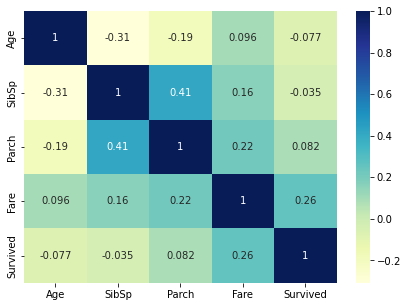

In [10]:
print('\nМатрица корреляции:')
fig, axes = plt.subplots(figsize=(7, 5))
sns.heatmap(df[numer+[target]].corr(),cmap='YlGnBu', annot=True)
plt.show()

## Распределения пасажиров по каждому из признаков

In [11]:
def hist_and_boxplot_for_feat(feat):
    if feat in numer:
        # Гистограмма
        hist_fig = px.histogram(df, x=feat, color="Survived")

        # Boxplot
        box_fig = px.box(df, x=target, y=feat, points="all")

        fig = sp.make_subplots(rows=1, cols=2, subplot_titles=[f"Гистограмма для признака: {feat}", f"Boxplot для признака: {feat}"])
        for trace in hist_fig.data:
            fig.add_trace(trace, row=1, col=1)
        for trace in box_fig.data:
            fig.add_trace(trace, row=1, col=2)
        fig.update_layout(height=400, width=950)
        fig.show()

    else:
        # Гистограмма
        hist_fig = px.histogram(df, x=feat, color="Survived")
        hist_fig.show()
        
@interact(feat=widgets.Dropdown(options=numer+categ, value=numer[0], description='Признак:\n'))
def update_plot(feat):
    hist_and_boxplot_for_feat(feat)


interactive(children=(Dropdown(description='Признак:\n', options=('Age', 'SibSp', 'Parch', 'Fare', 'Pclass', '…

По числовым признакам:
* Возраст пассажиров варьируется от нескольких месяцев до 81 года. Средний возраст пассажиров около 29 лет. Среди выживших больше людей 20-40 лет + дети до 6 лет. Выживваемость преобладает над смертностью только у группы детей.
* Большая часть пассажиров путешествовала без родственников, супругов, родителей и детей
* Цена билета очень варьируется от 0 до 512. Выживаемость превышает смертность в дорогих билетах.

По категориальным признакам:
* Выживаемость преобладала над сметрностью только в 1 классе билетов. При этом бОльшая часть пассажиров имела билет 3 класса.
* На борту было больше мужчин, однако выживаемость была больше у женщин
* Большинство пассажиров сели на борт в порту S, а важиваемость преобладает над смертностью у пассажиров зашедших в порту C

## График совместного распределения для признаков

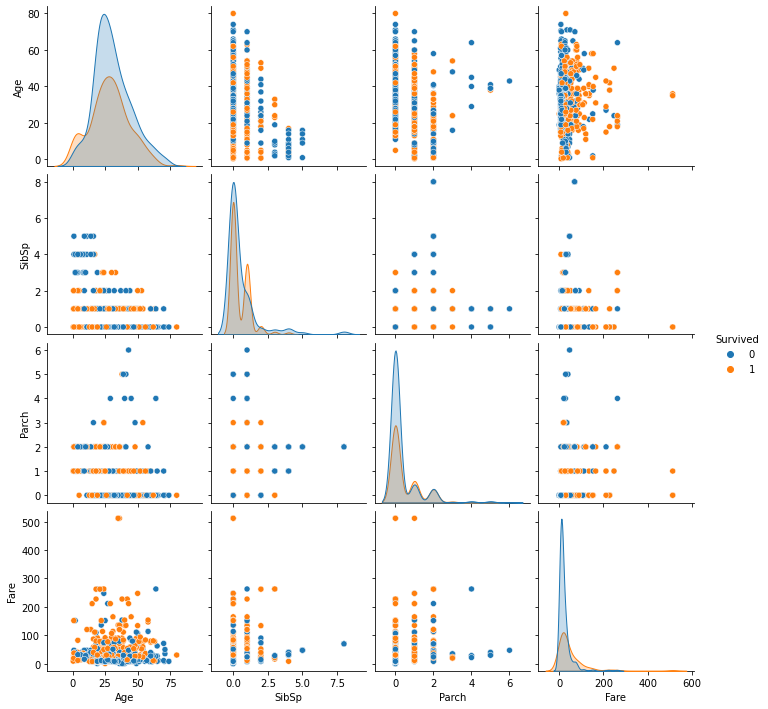

In [12]:
pair_plot = sns.pairplot(df[numer+['Survived']], hue='Survived', palette="tab10")
plt.show()

# Задание №2

Провести такое же описание пассажиров отдельно для каждого класса билета. Составить средний портрет пассажира каждого класса


In [13]:
all_feat = numer + list(set(categ) - set(['Pclass']))
def histograms_for_class(class_value):
    
    class_df = df[df['Pclass'] == class_value]
    
    fig = sp.make_subplots(rows=3, cols=2, subplot_titles=[
        f"Признак: {feat} \ Мода: {class_df[feat].mode().iloc[0]}" if feat in categ
        else f"Признак: {feat} \ Среднее: {round(class_df[feat].mean(),2)}"
        for feat in all_feat])

    for i, feat in enumerate(all_feat):
        row_num = (i // 2) + 1
        col_num = (i % 2) + 1
        hist_fig = px.histogram(class_df, x=feat, color="Survived", barmode='group')
        for trace in hist_fig.data:
            fig.add_trace(trace, row=row_num, col=col_num)
            
        fig.update_layout(title_text=f"Гистограммы для билета класса: {class_value}")

    fig.show()

@interact(class_value=widgets.Dropdown(options=df['Pclass'].unique(), value='1', description='Pclass:\n'))
def update_plot(class_value):
    histograms_for_class(class_value)

interactive(children=(Dropdown(description='Pclass:\n', index=1, options=('3', '1', '2'), value='1'), Output()…

Средний портрет пассажира каждого класса.
* 1 класс: Мужчина средних лет (38 лет) скорее всего без детей, супруги и родственников. Его билет по стоимости выше среднего (84). Cел на борт в порту S
* 2 класс: Молодой мужчина (30 лет) скорее всего без детей, супруги и родственников. Его билет по стоимости ниже среднего (21). Cел на борт в порту S
* 3 класс: Молодой мужчина (25 лет) скорее всего без детей, и родителей, но возможно с супругой или братом/сестрой. Его билет по стоимости ниже среднего (14). Cел на борт в порту S


# Задание №3

Провести такое же описание пассажиров отдельно для каждого диапазона возраста (<14, 14-21, 21-35, 35-55, >55). Составить средний портрет пассажира каждого возрастного диапазона


In [14]:
bins = [0, 14, 21, 35, 55, float('inf')]
labels = ['<14', '14-21', '21-35', '35-55', '>55']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
all_feat = list(set(numer) - set(['Age']))+categ 
def histograms_for_age_group(age_group):
    age_df = df[df['AgeGroup'] == age_group]
    fig = sp.make_subplots(rows=3, cols=2, subplot_titles=[
        f"Признак: {feat} \ Мода: {age_df[feat].mode().iloc[0]}" if feat in categ
        else f"Признак: {feat} \ Среднее: {round(age_df[feat].mean(), 2)}"
        for feat in all_feat])

    for i, feat in enumerate(all_feat):
        row_num = (i // 2) + 1
        col_num = (i % 2) + 1
        hist_fig = px.histogram(age_df, x=feat, color="Survived")
        for trace in hist_fig.data:
            fig.add_trace(trace, row=row_num, col=col_num)

        fig.update_layout(title_text=f"Гистограммы для возрастной группы: {age_group}")

    fig.show()

@interact(age_group=widgets.Dropdown(options=df['AgeGroup'].unique(), value='<14', description='Возрастная группа:\n'))
def update_plot(age_group):
    histograms_for_age_group(age_group)

interactive(children=(Dropdown(description='Возрастная группа:\n', index=3, options=('21-35', '35-55', nan, '<…

Cредний портрет пассажира каждой возрастной группы:
* $<14$: Это может быть как мальчик, так и девочка, как минимум с 1 из родителей и скорее всего с 2 братьями или сестрами. Проезд осуществлялся в 3 классе и стоил 31. Посадка осуществлялась в порту S.
* $14-21$: Молодой человек без родителей и детей, но возможно с братом\сестрой или супругой. Проезд осуществлялся в 3 классе и стоил 29. Посадка осуществлялась в порту S.
* $21-35$: Мужчина, скорее всего путешестовал один. Проезд осуществлялся в 3 классе и стоил 28. Посадка осуществлялась в порту S.
* $35-55$: Мужчина, скорее всего путешестовал один, возможно с родителем или с ребенком. Проезд осуществлялся в 1 классе и стоил 48. Посадка осуществлялась в порту S.
* $>55$: Мужчина, скорее всего путешестовал один. Проезд осуществлялся в 1 классе и стоил 44. Посадка осуществлялась в порту S

# Задание №4

На основе данных о пасажире научиться предсказывать в какой класс он попадет.
Провестиэксперимент с разными моделями logisitc regression, decision tree, svm.


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35-55
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35-55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35-55


In [16]:
def preprocessing(data, target):
    df = data.copy()
    # убираем из списка столбцов указанные выше признаки
    df.drop(['Name'], axis=1, inplace = True)
    df.drop(['Cabin'], axis=1,inplace=True)
    df.drop(['PassengerId'], axis=1,inplace=True)
    df.drop(['Ticket'], axis=1,inplace=True)
    
    # Убираем строки с пропусками
    df = df.dropna(subset=['Age'])
    df = df.dropna(subset=['Embarked'])

    
    X = df.drop(target, axis=1)
    y = df[target]

    # Деление на train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Разделяем фичи на категориальные и числовые
    categ = list( set(["Pclass", "Sex",'Embarked','Survived']) - set([target]))
    numer = ["Age","SibSp", "Parch", "Fare"]

    encoder = OneHotEncoder(drop='first')


    X_enc = encoder.fit_transform(X_train[categ])
    X_train_encoded = pd.concat([X_train[numer].reset_index(drop=True), pd.DataFrame(X_enc.toarray(), columns=encoder.get_feature_names_out(categ))], axis=1)

    X_enc_test = encoder.transform(X_test[categ])
    X_test_encoded = pd.concat([X_test[numer].reset_index(drop=True), pd.DataFrame(X_enc_test.toarray(), columns=encoder.get_feature_names_out(categ))], axis=1)

    return X_train_encoded, y_train, X_test_encoded, y_test


In [17]:
def train_models(X_train, X_test, y_train, y_test, models, params, n_class = 2):
    
    scores_df = pd.DataFrame(columns=["Модель", "Параметры", "Roc_auc", "Accuracy"])
    
    for title, clf in models.items():
        print(f"Рассматриваемая модель: {title}")

        model = clf
        param = params[title]

        grid_search = GridSearchCV(model, param, scoring='accuracy', cv=5, verbose=2)
        grid_search.fit(X_train, y_train)

        best_param = grid_search.best_params_
        print("Лучший вариант параметров:", best_param)
        
        best_model = grid_search.best_estimator_

        
        y_pred = best_model.predict(X_test)
        
        if n_class>2:
            y_pred_proba = best_model.predict_proba(X_test)
            roc_auc_sc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
            accur = accuracy_score(y_test, y_pred)
        else:
            roc_auc_sc = roc_auc_score(y_test, y_pred)
            accur = accuracy_score(y_test, y_pred)
        
        print('Результаты:')
        print("ROC AUC:", roc_auc_sc)
        print("Accuracy:", accur)

        scores_df = scores_df.append({
        "Модель": title,
        "Параметры": best_param,
        "Roc_auc": roc_auc_sc,
        "Accuracy": accur}, ignore_index=True)
    scores_df.sort_values(by=['Roc_auc','Accuracy' ],inplace=True,ascending=False)
    scores_df.reset_index(drop=True,inplace=True )

    return scores_df

In [18]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability = True),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier()
}


params = {
    "Logistic Regression": {
            'C': [0.01, 0.1, 1],
            'penalty':['l2'],
            'class_weight': ['balanced', None],
            },
    "Decision Tree": {'criterion': ['gini', 'entropy','log_loss'],
           'max_depth': [3, 5, 10, 15, 20],
           'min_samples_leaf': [3, 5, 10]
          },
    "SVM": {'C': [0.1, 1, 3, 5],
            'kernel': ['linear','rbf'],
            'gamma': ['scale', 'auto']
           },
    "Random Forest": {'n_estimators': [50, 100,150, 200],
           'max_depth': [2,3, 5, 10, 15],
           'class_weight': ['balanced','balanced_subsample', None],
           'bootstrap': [True, False]
          },
    "KNN": {'n_neighbors': [3, 5, 15, 20 , 30],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
           }, 
    "Gradient Boosting": {'n_estimators': [10, 30,50, 100 , 150],
            'learning_rate': [0.01, 0.1, 1]}

}            

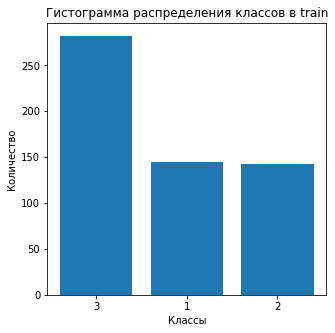

In [19]:
X_train,y_train,X_test,y_test = preprocessing(df, 'Pclass')

f, ax = plt.subplots(figsize=(5, 5))
counts = y_train.value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.title('Гистограмма распределения классов в train')
plt.show()


In [20]:
scores_df = train_models(X_train, X_test, y_train, y_test, models, params, n_class = 3)

Рассматриваемая модель: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ...........C=0.1, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] 

[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, 

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_we

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True,

[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_dep

[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END b

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END bootstrap=

[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_d

[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=200; total time=   0.0s
Лучший вариант параметров: {'bootstrap': True, 'class_weight': None, 'max_depth': 15, 'n_estimators': 200}
Результаты:
ROC AUC: 0.9963058360384492
Accuracy: 0.965034965034965
Рассматриваемая модель: KNN
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=3, p=1

[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.1s
[CV] END ...............lear

In [21]:
scores_df

,Модель,Параметры,Roc_auc,Accuracy
0,Gradient Boosting,"{'learning_rate': 1, 'n_estimators': 100}",0.997489,0.965035
1,Random Forest,"{'bootstrap': True, 'class_weight': None, 'max...",0.996306,0.965035
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.980358,0.951049
3,KNN,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.961617,0.881119
4,Logistic Regression,"{'C': 1, 'class_weight': None, 'penalty': 'l2'}",0.944659,0.860140
5,SVM,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.939611,0.902098


# Задание №5

На основе данных о пасажире научиться предсказывать выживет ли он или нет. Провестиэксперимент с разными моделями logisitc regression, decision tree, svm.

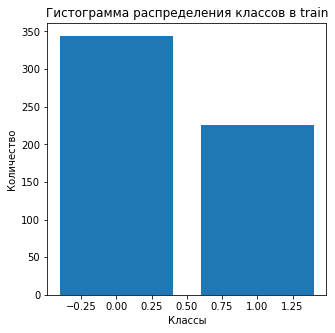

In [22]:
X_train,y_train,X_test,y_test = preprocessing(df, 'Survived')
f, ax = plt.subplots(figsize=(5, 5))
counts = y_train.value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.title('Гистограмма распределения классов в train')
plt.show()


In [23]:
scores_df_5 = train_models(X_train, X_test, y_train, y_test, models, params)

Рассматриваемая модель: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..........C=0.01, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ..............C=0.01, class_weight=None, penalty=l2; total time=   0.0s
[CV] END ...........C=0.1, class_weight=balanced, penalty=l2; total time=   0.0s
[CV] 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entro

[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=20, min_samples_leaf=10; total time=   0.0s
Лучший вариант параметров: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
Результаты:
ROC AUC: 0.7645833333333334
Accuracy: 0.7762237762237763
Рассматриваемая модель: SVM
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END 

[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=T

[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=2, n_estimators=50; total time=  

[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=150; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=

[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=150; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, class_weight=None, max_depth=10, n_

[CV] END bootstrap=False, class_weight=balanced, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=5, n_estimators=100; total time=   0.0s
[CV] END bootst

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END bootstrap=Fals

[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=balanced_subsample, max_depth=15, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False,

[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=150; total time=   0.1s
[CV] END bootstrap=False, class_weight=None, max_depth=15, n_estimators=150; total time=   0.0s
[CV] END bootstrap=False, class_weight=N

[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END ................lea

In [24]:
scores_df_5

,Модель,Параметры,Roc_auc,Accuracy
0,Logistic Regression,"{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}",0.791270,0.804196
1,Random Forest,"{'bootstrap': True, 'class_weight': None, 'max...",0.787897,0.804196
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.764583,0.776224
3,Gradient Boosting,"{'learning_rate': 0.1, 'n_estimators': 30}",0.754464,0.776224
4,SVM,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.734524,0.748252
5,KNN,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.628968,0.643357
